<img src="https://cdn.siberian.dev/siberian.png" alt="Siberian Logo">

### Linear Support Vector Regression with Scale & Power Transformer

This Code template is for the regression analysis using a LinearSVR regressor where rescaling is done using Scale and feature transformation is done using Power Transformer in a pipeline.

### Required Packages

In [ ]:
!pip install imblearn

In [4]:
import warnings as wr
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import scale, PowerTransformer
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVR
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
wr.filterwarnings('ignore')

### Initialization
Filepath of CSV file

In [ ]:
#filepath
file_path= ""

List of features which are  required for model training.

In [8]:
#x_values
features=[]

Target feature for prediction.

In [7]:
#y_value
target=''

### Data Fetching

Pandas is an open-source, BSD-licensed library providing high-performance, easy-to-use data manipulation and data analysis tools.

We will use panda's library to read the CSV file using its storage path.And we use the head function to display the initial row or entry.

In [6]:
df=pd.read_csv(file_path) #reading file
df.head()#displaying initial entries

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### Feature Selections

It is the process of reducing the number of input variables when developing a predictive model. Used to reduce the number of input variables to both reduce the computational cost of modelling and, in some cases, to improve the performance of the model.

We will assign all the required input features to X and target/outcome to Y.

In [9]:
X=df[features]
Y=df[target]

### Data Preprocessing

Since the majority of the machine learning models in the Sklearn library doesn't handle string category data and Null value, we have to explicitly remove or replace null values. The below snippet have functions, which removes the null value if any exists. And convert the string classes data in the datasets by encoding them to integer classes.


In [10]:
def NullClearner(df):
    if(isinstance(df, pd.Series) and (df.dtype in ["float64","int64"])):
        df.fillna(df.mean(),inplace=True)
        return df
    elif(isinstance(df, pd.Series)):
        df.fillna(df.mode()[0],inplace=True)
        return df
    else:return df
def EncodeX(df):
    return pd.get_dummies(df)

Calling preprocessing functions on the feature and target set.


In [12]:
x=X.columns.to_list()
for i in x:
    X[i]=NullClearner(X[i])
X=EncodeX(X)
Y=NullClearner(Y)
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


#### Correlation Map

In order to check the correlation between the features, we will plot a correlation matrix. It is effective in summarizing a large amount of data where the goal is to see patterns.

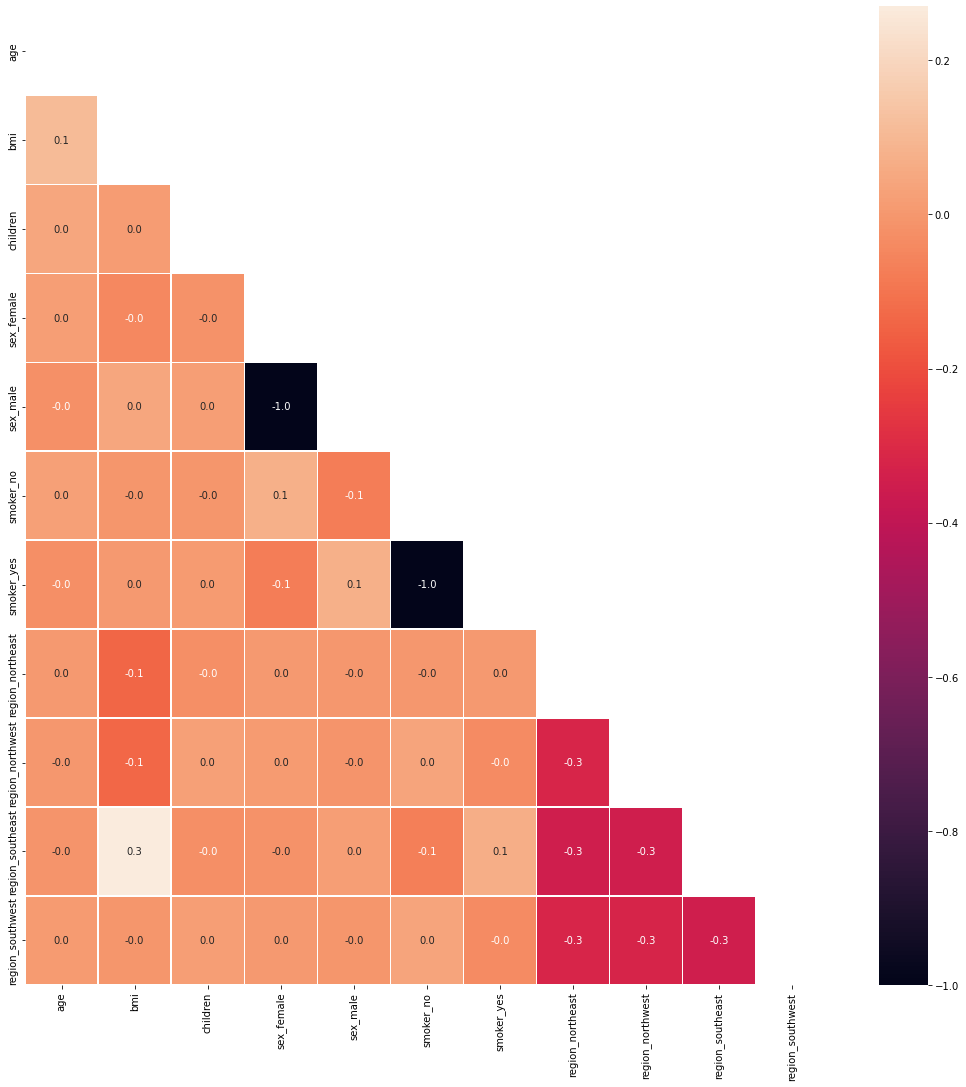

In [13]:
f,ax = plt.subplots(figsize=(18, 18))
matrix = np.triu(X.corr())
sns.heatmap(X.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax, mask=matrix)
plt.show()

### Data Splitting

The train-test split is a procedure for evaluating the performance of an algorithm. The procedure involves taking a dataset and dividing it into two subsets. The first subset is utilized to fit/train the model. The second subset is used for prediction. The main motive is to estimate the performance of the model on new data.

In [14]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=123)

###Data Rescaling
####Scale

It is a step of Data Pre Processing which is applied to independent variables or features of data. It basically helps to normalise the data within a particular range. Sometimes, it also helps in speeding up the calculations in an algorithm.

In [15]:
x_train =scale(x_train)
x_test = scale(x_test)

### Power Transformer

Apply a power transform featurewise to make data more Gaussian-like.

Power transforms are a family of parametric, monotonic transformations that are applied to make data more Gaussian-like. This is useful for modeling issues related to heteroscedasticity (non-constant variance), or other situations where normality is desired.

###Linear Support Vector Regression.

Similar to SVR with parameter kernel=’linear’, but implemented in terms of liblinear rather than libsvm, so it has more flexibility in the choice of penalties and loss functions and should scale better to large numbers of samples.

This class supports both dense and sparse input.

###Model Tuning Parameters
**epsilon: float, default=0.0** ->
Epsilon parameter in the epsilon-insensitive loss function. Note that the value of this parameter depends on the scale of the target variable y. If unsure, set epsilon=0.

**tol: float, default=1e-4** ->
Tolerance for stopping criteria.

**C: float, default=1.0** ->
Regularization parameter. The strength of the regularization is inversely proportional to C. Must be strictly positive.

**loss: {‘epsilon_insensitive’, ‘squared_epsilon_insensitive’}, default=’epsilon_insensitive’** ->
Specifies the loss function. The epsilon-insensitive loss (standard SVR) is the L1 loss, while the squared epsilon-insensitive loss (‘squared_epsilon_insensitive’) is the L2 loss.

**fit_intercept: bool, default=True** ->
Whether to calculate the intercept for this model. If set to false, no intercept will be used in calculations (i.e. data is expected to be already centered).

**intercept_scaling: float, default=1.** ->
When self.fit_intercept is True, instance vector x becomes [x, self.intercept_scaling], i.e. a “synthetic feature with constant value equals to intercept_scaling is appended to the instance vector. The intercept becomes intercept_scaling * synthetic feature weight Note! the synthetic feature weight is subject to l1/l2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) intercept_scaling has to be increased.

**dual: bool, default=True** ->
Select the algorithm to either solve the dual or primal optimization problem. Prefer dual=False when n_samples > n_features.

**verbose: int, default=0** ->
Enable verbose output. Note that this setting takes advantage of a per-process runtime setting in liblinear that, if enabled, may not work properly in a multithreaded context.

**random_state: int, RandomState instance or None, default=None** ->
Controls the pseudo random number generation for shuffling the data. Pass an int for reproducible output across multiple function calls. See Glossary.

**max_iter: int, default=1000** ->
The maximum number of iterations to be run.

In [20]:
model=make_pipeline(PowerTransformer(), LinearSVR(loss='squared_epsilon_insensitive'))
model.fit(x_train,y_train)

Pipeline(memory=None,
         steps=[('powertransformer',
                 PowerTransformer(copy=True, method='yeo-johnson',
                                  standardize=True)),
                ('linearsvr',
                 LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
                           intercept_scaling=1.0,
                           loss='squared_epsilon_insensitive', max_iter=1000,
                           random_state=None, tol=0.0001, verbose=0))],
         verbose=False)

#### Model Accuracy

We will use the trained model to make a prediction on the test set.Then use the predicted value for measuring the accuracy of our model.

score: The score function returns the coefficient of determination R2 of the prediction.



In [21]:
print("Accuracy score {:.2f} %\n".format(model.score(x_test,y_test)*100))

Accuracy score 78.30 %



> **r2_score**: The **r2_score** function computes the percentage variablility explained by our model, either the fraction or the count of correct predictions.  

> **mae**: The **mean abosolute error** function calculates the amount of total error(absolute average distance between the real data and the predicted data) by our model.  

> **mse**: The **mean squared error** function squares the error(penalizes the model for large errors) by our model. 

In [22]:
y_pred=model.predict(x_test)
print("R2 Score: {:.2f} %".format(r2_score(y_test,y_pred)*100))
print("Mean Absolute Error {:.2f}".format(mean_absolute_error(y_test,y_pred)))
print("Mean Squared Error {:.2f}".format(mean_squared_error(y_test,y_pred)))

R2 Score: 78.30 %
Mean Absolute Error 4004.93
Mean Squared Error 33182690.51


#### Prediction Plot

First, we make use of a plot to plot the actual observations, with x_train on the x-axis and y_train on the y-axis.
For the regression line, we will use x_train on the x-axis and then the predictions of the x_train observations on the y-axis.

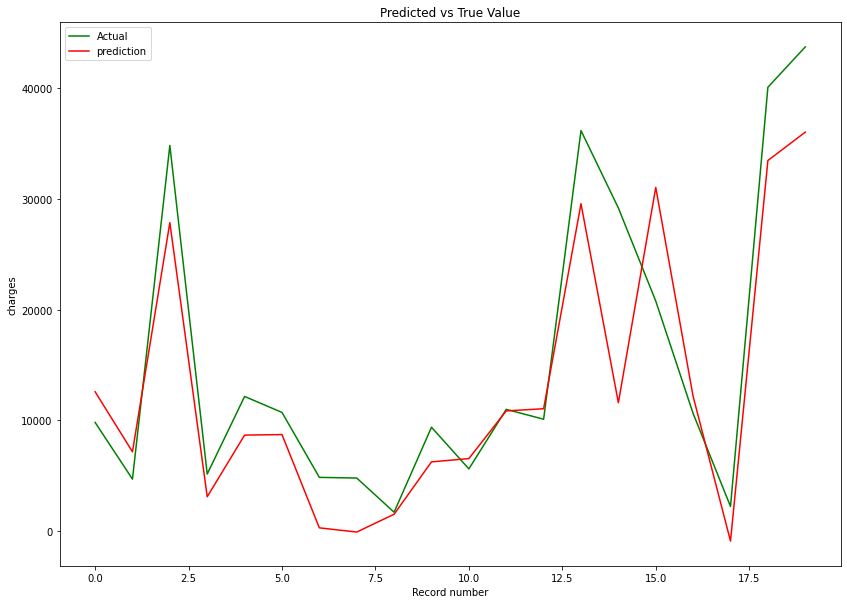

In [23]:
n=len(x_test) if len(x_test)<20 else 20
plt.figure(figsize=(14,10))
plt.plot(range(n),y_test[0:n], color = "green")
plt.plot(range(n),model.predict(x_test[0:n]), color = "red")
plt.legend(["Actual","prediction"]) 
plt.title("Predicted vs True Value")
plt.xlabel("Record number")
plt.ylabel(target)
plt.show()

#### Creator: Ayush Gupta , Github: [Profile](https://github.com/guptayush179)